In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import psycopg2
import json
import os
from sqlalchemy import create_engine, text
from urllib.parse import quote
from Modules.PostgresDBConnect import PostgresDBConnect
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pathlib
import matplotlib.pyplot as plt
import shapely 
%matplotlib inline

In [2]:
kml_folder = r'F:\Toronto Railway Transit Routes\KML'

In [3]:
reader = PostgresDBConnect.FileReader()

In [4]:
# import geopandas as gpd
# import fiona

# layers = fiona.listlayers(r'F:\Toronto Railway Transit Routes\KML\Transit Routes.KML')
# layers

In [5]:
routes_gdf = reader.read_file(kml_folder, 'Transit Routes.kml', layer = 'Bus')

In [6]:
print(routes_gdf)

                             Name Description  \
0                       VIVA Pink               
1                     Viva Orange               
2                     Viva Yellow               
3                      Viva Green               
4                      Viva Green               
..                            ...         ...   
717  TTC Route 985B Sheppard East               
718          TTC Route 989 Weston               
719          TTC Route 996 Wilson               
720            TTC Line 3 Ontario               
721     TTC Line 7  Eglinton East               

                                              geometry  
0    LINESTRING Z (-79.41521 43.78224 0, -79.41564 ...  
1    LINESTRING Z (-79.6096 43.77591 0, -79.59742 4...  
2    LINESTRING Z (-79.48688 44.05303 0, -79.48583 ...  
3    LINESTRING Z (-79.28428 43.86727 0, -79.28862 ...  
4    LINESTRING Z (-79.37085 43.79673 0, -79.35122 ...  
..                                                 ...  
717  LINESTR

In [7]:
routes_gdf.geom_type.unique()

array(['LineString', 'Point'], dtype=object)

In [8]:
points_routes_gdf = routes_gdf[routes_gdf.geom_type == "Point"].reset_index(drop=True).sort_values(by='Name', ascending=True)
points_routes_gdf.info()
points_routes_gdf.geom_type.unique()
points_routes_gdf.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 126 entries, 30 to 84
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         126 non-null    object  
 1   Description  126 non-null    object  
 2   geometry     126 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 3.9+ KB


,Name,Description,geometry
30,"(1,11A,11C,14,97B,97C,97D,97F) Davisville",,POINT Z (-79.39703 43.69763 0)
4,"(1,2) Bloor-Yonge",,POINT Z (-79.38639 43.6707 0)
3,"(1,2,26) St. George",,POINT Z (-79.39981 43.66823 0)


In [9]:
lines_routes_gdf = routes_gdf[routes_gdf.geom_type == "LineString"].reset_index(drop=True).sort_values(by='Name', ascending=True)
lines_routes_gdf.info()
lines_routes_gdf.geom_type.unique()
lines_routes_gdf.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 596 entries, 14 to 244
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         596 non-null    object  
 1   Description  596 non-null    object  
 2   geometry     596 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 18.6+ KB


,Name,Description,geometry
14,Barrie Line,,"LINESTRING Z (-79.38114 43.64446 0, -79.38333 ..."
45,Bathurst 7,,"LINESTRING Z (-79.41125 43.66579 0, -79.41093 ..."
53,Bellamy 9,,"LINESTRING Z (-79.27962 43.71118 0, -79.27945 ..."


<Axes: >

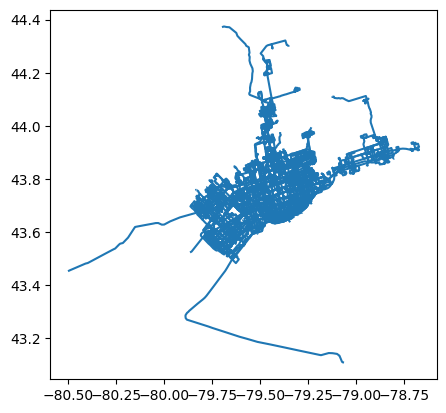

In [10]:
lines_routes_gdf.plot()

In [11]:
neighborhood_gdf = reader.read_file(kml_folder, 'TO - Neighbourhoods.kml', layer='Neighbourhoods')
industrial_gdf   = reader.read_file(kml_folder, 'TO - Neighbourhoods.kml', layer='Industrial / Commercial')
parkland_gdf     = reader.read_file(kml_folder, 'TO - Neighbourhoods.kml', layer='Parkland')

In [12]:
neighborhood_gdf.info()
industrial_gdf.info()
parkland_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         208 non-null    object  
 1   Description  208 non-null    object  
 2   geometry     208 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 5.0+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         11 non-null     object  
 1   Description  11 non-null     object  
 2   geometry     11 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 396.0+ bytes
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         3 non-null      object  


In [13]:
neighborhood_gdf.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [14]:
industrial_gdf.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [15]:
parkland_gdf.geom_type.unique()

array(['MultiPolygon', 'Polygon'], dtype=object)

In [16]:
neighborhood_gdf.head(3)

,Name,Description,geometry
0,Entertainment District,,"POLYGON Z ((-79.39599 43.64785 0, -79.39377 43..."
1,Niagara,,"POLYGON Z ((-79.40139 43.64068 0, -79.40402 43..."
2,Fashion District,,"POLYGON Z ((-79.40402 43.64718 0, -79.40139 43..."


<Axes: >

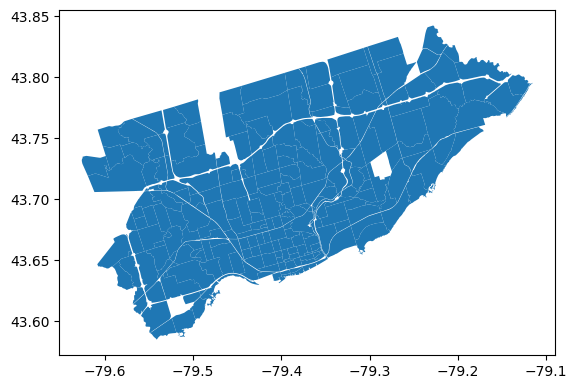

In [17]:
neighborhood_gdf.plot()

In [18]:
industrial_gdf.head(3)

,Name,Description,geometry
0,Armdale,,"POLYGON Z ((-79.25765 43.80986 0, -79.25157 43..."
1,Billy Bishop Airport,,"POLYGON Z ((-79.39978 43.62384 0, -79.39712 43..."
2,Claireville,,"MULTIPOLYGON Z (((-79.63044 43.74524 0, -79.63..."


<Axes: >

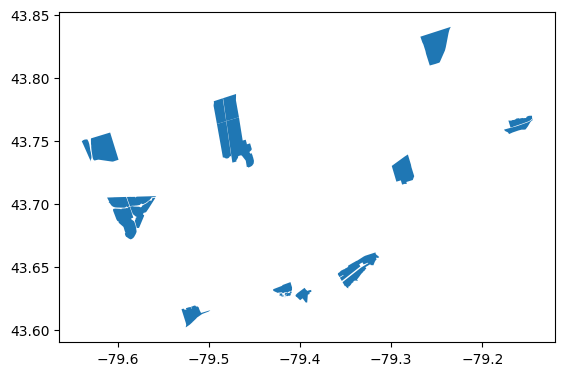

In [19]:
industrial_gdf.plot()

In [20]:
parkland_gdf.head(3)

,Name,Description,geometry
0,Rouge Park,,"MULTIPOLYGON Z (((-79.13421 43.80407 0, -79.13..."
1,Leslie Spit,,"POLYGON Z ((-79.32863 43.64797 0, -79.32839 43..."
2,Toronto Islands,,"MULTIPOLYGON Z (((-79.38296 43.62094 0, -79.38..."


<Axes: >

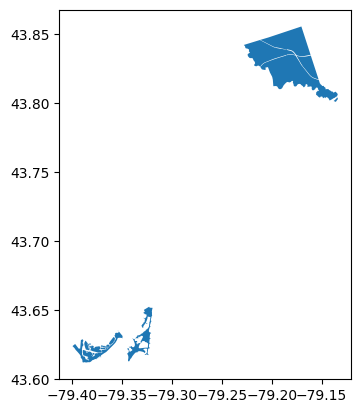

In [21]:
parkland_gdf.plot()

In [ ]:
#Checking crs of each geodataframe
print(lines_routes_gdf.crs)
print(neighborhood_gdf.crs)
print(industrial_gdf.crs)
print(parkland_gdf.crs)

EPSG:4326
EPSG:4326
EPSG:4326
EPSG:4326


In [23]:
gdf_flat = gpd.GeoDataFrame(
    pd.concat(
        [neighborhood_gdf[["Name", "Description", "geometry"]],
         industrial_gdf[["Name", "Description", "geometry"]],
         parkland_gdf[["Name", "Description", "geometry"]]]
    ).reset_index(drop=True),
    crs="EPSG:4326"
)

<Axes: >

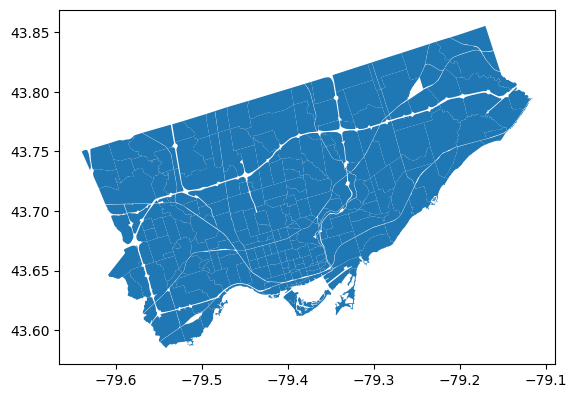

In [24]:
gdf_flat.plot()

In [25]:
print(gdf_flat.crs)

EPSG:4326


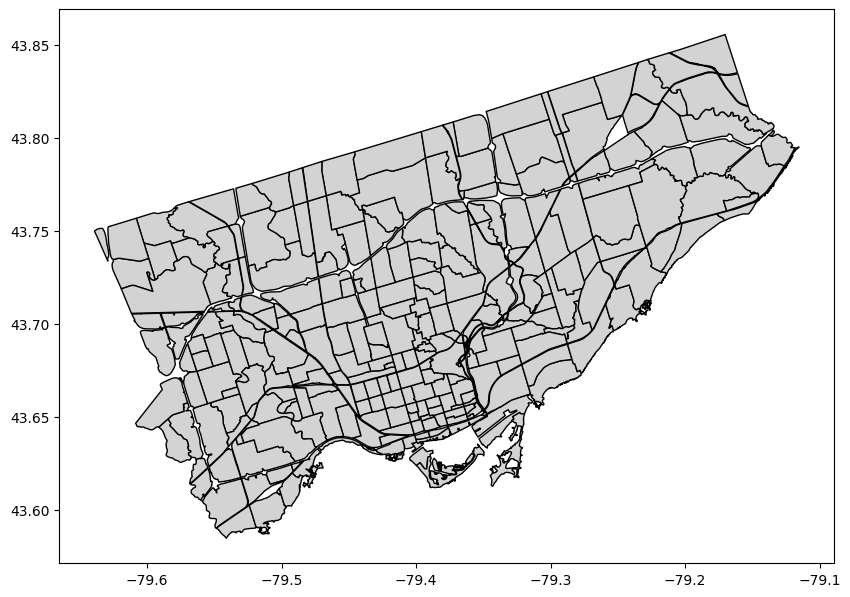

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_flat.plot(ax=ax, color="lightgrey", edgecolor="black")
plt.show()

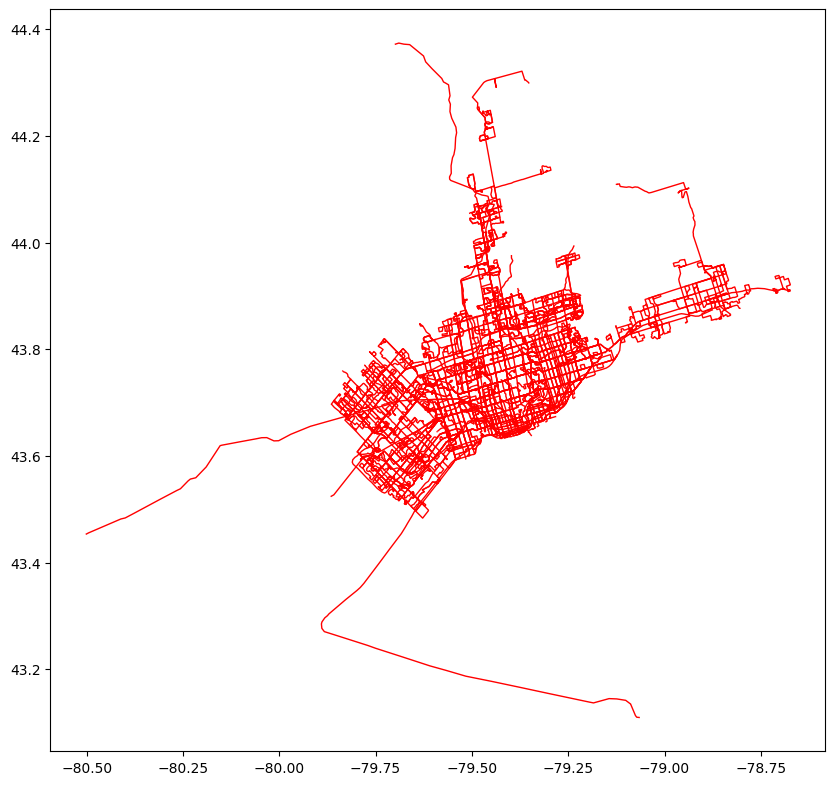

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
lines_routes_gdf.plot(ax=ax, color="red", linewidth=1)
plt.show()

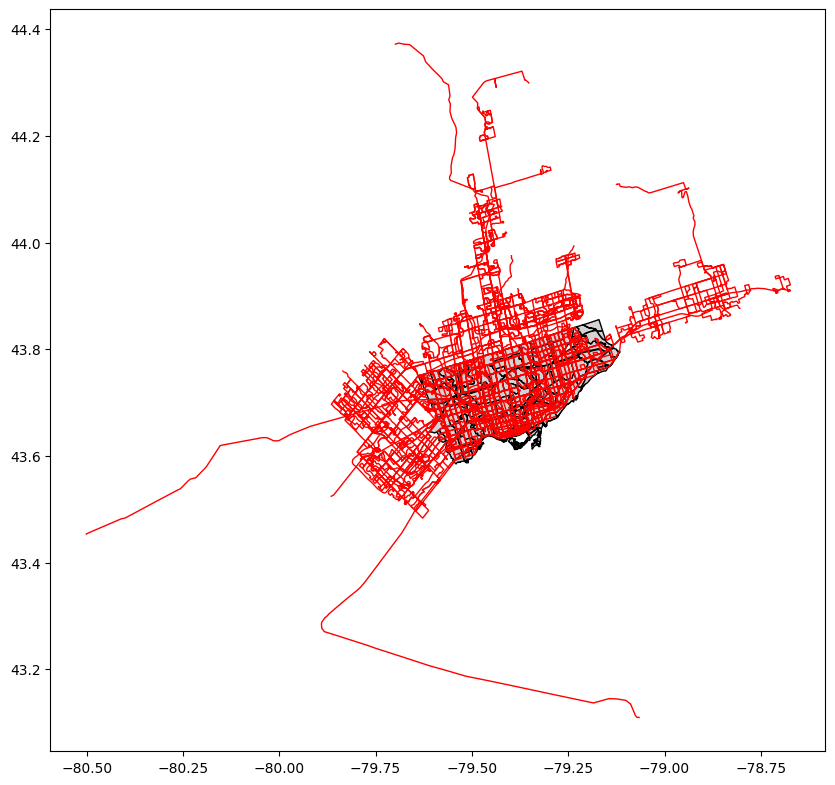

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_flat.plot(ax=ax, color="lightgrey", edgecolor="black")
lines_routes_gdf.plot(ax=ax, color="red", linewidth=1)
plt.show()

In [29]:
gdf_clip = gpd.clip(lines_routes_gdf, gdf_flat)

<Axes: >

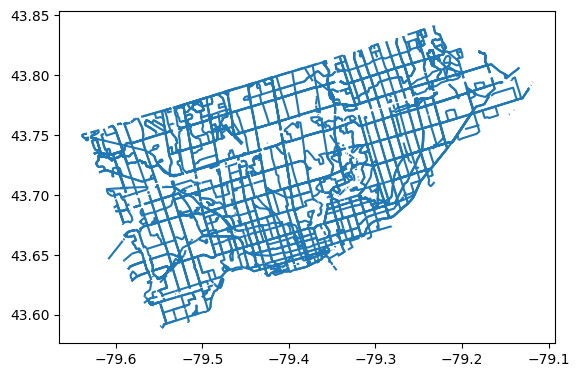

In [30]:
gdf_clip.plot()

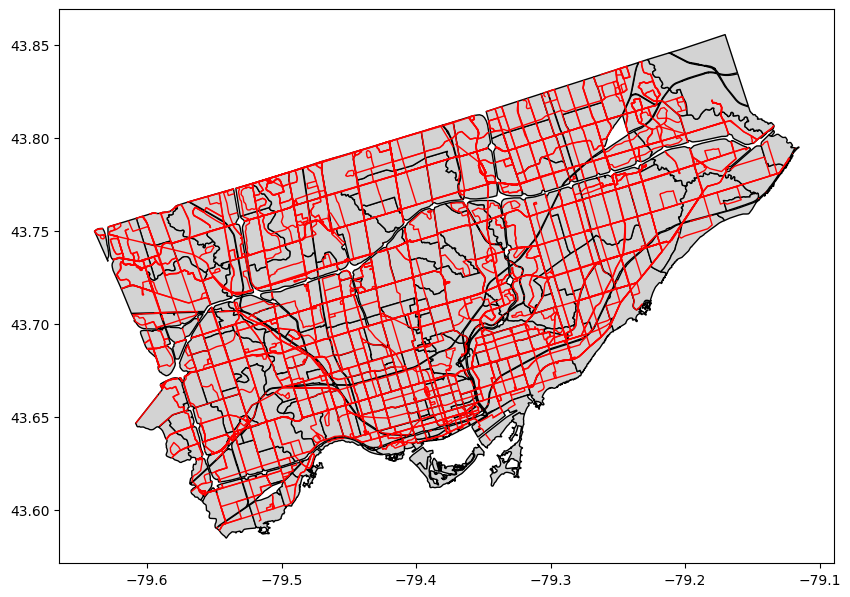

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_flat.plot(ax=ax, color="lightgrey", edgecolor="black")
gdf_clip.plot(ax=ax, color="red", linewidth=1)
plt.show()

In [32]:
SqlConn = PostgresDBConnect.Connector("toronto_railway_transit")
SqlConn.connect()

Connecting to toronto_railway_transit database
[Connect] Successfully connected to toronto_railway_transit database (toronto_railway_transit)


In [33]:
dumper = PostgresDBConnect.DataDumper(SqlConn.conn, SqlConn.engine)

In [34]:
dumper.raw_geo_data_import(gdf_clip,'transit_routes','raw')

[Data Dumper] Loaded to SQL Table


In [35]:
dumper.raw_geo_data_import(gdf_flat,'toronto_neighborhoods','raw')

[Data Dumper] Loaded to SQL Table


In [36]:
dumper.call_sp('public.sp_update_transit_routes')

[SP Callback] SP public.sp_update_transit_routes executed successfully.


In [37]:
dumper.call_sp('sp_update_toronto_neighborhoods')

[SP Callback] SP sp_update_toronto_neighborhoods executed successfully.


In [38]:
SqlConn.disconnect()

[Disconnect] Successfully Disconnected from toronto_railway_transit PostgreSQL database
